In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from lxml import etree # 解析我们的xml
import glob
from matplotlib.patches import Rectangle #绘制矩形框

In [2]:
print('Tensorflow version: {}'.format(tf.__version__))

Tensorflow version: 2.2.0


In [3]:
img = tf.io.read_file('datasets/images/Abyssinian_1.jpg')

In [4]:
img = tf.image.decode_jpeg(img)

In [5]:
img.shape

TensorShape([400, 600, 3])

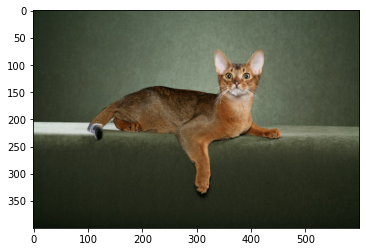

In [6]:
plt.imshow(img)

In [7]:
xml = open(r'datasets/annotations/xmls/Abyssinian_1.xml').read()

In [8]:
sel = etree.HTML(xml)

In [9]:
# 由于是唯一标签因此我们可以冲根目录上去寻找
width = int(sel.xpath('//size/width/text()')[0])

In [10]:
width

600

In [11]:
# 由于是唯一标签因此我们可以冲根目录上去寻找
height = int(sel.xpath('//size/height/text()')[0])
xmin = int(sel.xpath('//bndbox/xmin/text()')[0])
xmax = int(sel.xpath('//bndbox/xmax/text()')[0])
ymax = int(sel.xpath('//bndbox/ymin/text()')[0])
ymin = int(sel.xpath('//bndbox/ymax/text()')[0])

In [12]:
height,xmin,xmax,ymin,ymin

(400, 333, 425, 158, 158)

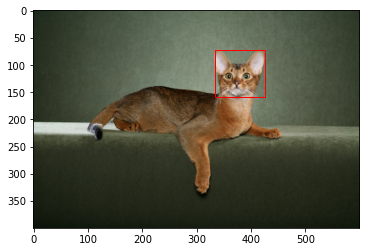

In [13]:
plt.imshow(img)
rect = Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin),fill=False, color='red')
ax = plt.gca()
ax.axes.add_patch(rect)

In [14]:
img = tf.image.resize(img,[224,224])

In [15]:
img = img/255  # 标准化

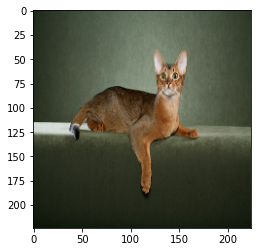

In [16]:
plt.imshow(img.numpy())

In [17]:
xmin = (xmin/width) *224
ymin = (ymin/height) *224
xmax = (xmax/width) *224
ymax = (ymax/height) *224

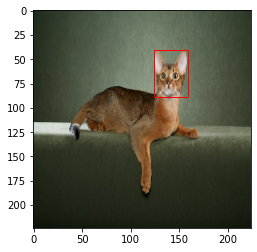

In [18]:
plt.imshow(img)
rect = Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin),fill=False, color='red')
ax = plt.gca()
ax.axes.add_patch(rect)

# 创建输入管道

In [19]:
images = glob.glob('datasets/images/*.jpg')

In [20]:
images[-5:]

['datasets/images\\yorkshire_terrier_95.jpg',
 'datasets/images\\yorkshire_terrier_96.jpg',
 'datasets/images\\yorkshire_terrier_97.jpg',
 'datasets/images\\yorkshire_terrier_98.jpg',
 'datasets/images\\yorkshire_terrier_99.jpg']

In [21]:
len(images)

7390

In [22]:
xmls = glob.glob('datasets/annotations/xmls/*.xml')

In [23]:
xmls[:3]

['datasets/annotations/xmls\\Abyssinian_1.xml',
 'datasets/annotations/xmls\\Abyssinian_10.xml',
 'datasets/annotations/xmls\\Abyssinian_100.xml']

In [24]:
len(xmls)

3686

In [25]:
names = [x.split('\\')[-1].split('.xml')[0] for x in xmls]

In [26]:
imgs_train = [img for img in images if (img.split('\\')[-1].split('.jpg')[0]) in names]

In [27]:
imgs_train[-3:]

['datasets/images\\yorkshire_terrier_188.jpg',
 'datasets/images\\yorkshire_terrier_189.jpg',
 'datasets/images\\yorkshire_terrier_190.jpg']

In [28]:
len(imgs_train)

3686

In [29]:
imgs_test = [img for img in images if (img.split('\\')[-1].split('.jpg')[0]) not  in names]

In [30]:
len(imgs_test)

3704

In [31]:
# 将标签和图片排序
imgs_train.sort(key=lambda x:x.split('\\')[-1].split('.jpg')[0])

In [32]:
xmls.sort(key=lambda x:x.split('\\')[-1].split('.xml')[0])

In [33]:
imgs_train[-5:]

['datasets/images\\yorkshire_terrier_186.jpg',
 'datasets/images\\yorkshire_terrier_187.jpg',
 'datasets/images\\yorkshire_terrier_188.jpg',
 'datasets/images\\yorkshire_terrier_189.jpg',
 'datasets/images\\yorkshire_terrier_190.jpg']

In [34]:
xmls[-5:]

['datasets/annotations/xmls\\yorkshire_terrier_186.xml',
 'datasets/annotations/xmls\\yorkshire_terrier_187.xml',
 'datasets/annotations/xmls\\yorkshire_terrier_188.xml',
 'datasets/annotations/xmls\\yorkshire_terrier_189.xml',
 'datasets/annotations/xmls\\yorkshire_terrier_190.xml']

In [35]:
def to_labels(path):
    xml = open('{}'.format(path)).read()
    sel = etree.HTML(xml)
    # 由于是唯一标签因此我们可以冲根目录上去寻找
    width = int(sel.xpath('//size/width/text()')[0])
    # 由于是唯一标签因此我们可以冲根目录上去寻找
    height = int(sel.xpath('//size/height/text()')[0])
    xmin = int(sel.xpath('//bndbox/xmin/text()')[0])
    xmax = int(sel.xpath('//bndbox/xmax/text()')[0])
    ymax = int(sel.xpath('//bndbox/ymin/text()')[0])
    ymin = int(sel.xpath('//bndbox/ymax/text()')[0])
    return [xmin/width, ymin/height, xmax/width, ymax/height]

In [36]:
labels = [to_labels(path) for path in xmls]

In [37]:
labels[:3]

[[0.555, 0.395, 0.7083333333333334, 0.18],
 [0.192, 0.582, 0.768, 0.21],
 [0.383248730964467, 0.534, 0.850253807106599, 0.142]]

In [38]:
out1, out2, out3, out4 = list(zip(*labels))

In [39]:
out1

(0.555,
 0.192,
 0.383248730964467,
 0.12,
 0.046,
 0.482,
 0.474,
 0.560546875,
 0.188,
 0.1,
 0.2872340425531915,
 0.22395833333333334,
 0.0625,
 0.596,
 0.22857142857142856,
 0.46875,
 0.346875,
 0.476,
 0.2132132132132132,
 0.144,
 0.003003003003003003,
 0.13,
 0.28059701492537314,
 0.23595505617977527,
 0.2809917355371901,
 0.65,
 0.306,
 0.26426426426426425,
 0.43,
 0.176,
 0.3609022556390977,
 0.092,
 0.34234234234234234,
 0.5918367346938775,
 0.27927927927927926,
 0.05466237942122187,
 0.4,
 0.09,
 0.148,
 0.06006006006006006,
 0.3153153153153153,
 0.370625,
 0.5,
 0.212,
 0.48955223880597015,
 0.462,
 0.07592190889370933,
 0.336,
 0.32,
 0.182,
 0.2875,
 0.11711711711711711,
 0.606,
 0.31,
 0.033542976939203356,
 0.32,
 0.4657142857142857,
 0.3632075471698113,
 0.692,
 0.278,
 0.09982788296041308,
 0.566,
 0.174,
 0.308,
 0.08524590163934426,
 0.75,
 0.548,
 0.35,
 0.378,
 0.048,
 0.09333333333333334,
 0.31629392971246006,
 0.0925,
 0.14,
 0.13818181818181818,
 0.561875,
 0.65

In [40]:
out1 = np.array(out1)
out2 = np.array(out2)
out3 = np.array(out3)
out4 = np.array(out4)

In [41]:
label_datasets = tf.data.Dataset.from_tensor_slices((out1,out2,out3,out4))

In [42]:
label_datasets

<TensorSliceDataset shapes: ((), (), (), ()), types: (tf.float64, tf.float64, tf.float64, tf.float64)>

In [43]:
def load_image(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [224,224])
    img = img/127.5 -1
    return img

In [44]:
image_dataset = tf.data.Dataset.from_tensor_slices(imgs_train)

In [45]:
image_dataset = image_dataset.map(load_image)

In [46]:
image_dataset

<MapDataset shapes: (224, 224, 3), types: tf.float32>

In [47]:
dataset = tf.data.Dataset.zip((image_dataset,label_datasets))

In [48]:
# 训练输入  以及对应的label
dataset

<ZipDataset shapes: ((224, 224, 3), ((), (), (), ())), types: (tf.float32, (tf.float64, tf.float64, tf.float64, tf.float64))>

In [49]:
test_count=int(len(images)*0.2)

In [50]:
test_count 

1478

In [51]:
train_count = len(images) - test_count

In [52]:
dataset_train = dataset.skip(test_count)

In [53]:
dataset_test = dataset.take(test_count)

In [54]:
BATCH_SIZE = 8
BUFFER_SIZE = 300
STEP_PER_EPOCH = train_count // BATCH_SIZE
VALIDATION_STEPS = test_count // BATCH_SIZE

In [55]:
train_dataset = dataset_train.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size= tf.data.experimental.AUTOTUNE)
test_dataset= dataset_test.batch(BATCH_SIZE)

In [56]:
for img,label in dataset.take(1):
    plt.imshow(tf.keras.preprocessing.image.array_to_img(img[0]))
    out1,out2,out3,out4 = label
    xmin,ymin,xmax,ymax = out1[0].numpy()*224,out2[0].numpy()*224,out3[0].numpy()*224,out4[0].numpy()*224
    rect = Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin),fill=False, color='red')
    ax = plt.gca()
    ax.axes.add_patch(rect)
    plt.show()

ValueError: Expected image array to have rank 3 (single image). Got array with shape: (224, 3)

# 图像定位模型创建

In [ ]:
xception = tf.keras.applications.Xception(weights='imagenet',
                                         include_top=False,
                                         input_shape=(224,224,3))

In [ ]:
 xception.trainablea =False

In [ ]:
inputs = tf.keras.layers.Input(shape=(224,224,3))

x = xception(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(2048,activation='relu')(x)
x = tf.keras.layers.Dense(256,activation='relu')(x)

out1 = tf.keras.layers.Dense(1)(x)
out2 = tf.keras.layers.Dense(1)(x)
out3 = tf.keras.layers.Dense(1)(x)
out4 = tf.keras.layers.Dense(1)(x)

prediction =[out1,out2,out3,out4]

model = tf.keras.models.Model(inputs=inputs, outputs=prediction)

In [ ]:
model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='mse',#回归问题常用的损失函数
              metrics=['mae']# 平均绝对误差
             )

In [ ]:
EPOCHS = 50

In [ ]:
history = model.fit(train_dataset,
                   epochs=EPOCHS,
                   steps_per_epoch=STEP_PER_EPOCH,
                   validation_steps=VALIDATION_STEPS,
                   validation_data=test_dataset
                   )